In [1]:
library(data.table)
library(dplyr)
library(survival)
library(forestplot)
library(repr)

source("/home/luo_wenjin/data/IHA_ML/00_utils.R")
setwd("/home/luo_wenjin/data/IHA_ML/")

# Load datasets
datasets <- list(
  all_cause_mortality_ukb = fread("ukb_all_cause_mortality.csv"),
  cvd_mortality_ukb = fread("ukb_cvd_mortality.csv"),
  all_cause_mortality_fos = fread("fos_all_cause_mortality.csv"),
  cvd_mortality_fos = fread("fos_cvd_mortality.csv")
)

head(datasets[[1]])
head(datasets[[2]])
head(datasets[[3]])
head(datasets[[4]])


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: checkmate

Loading required package: abind



outcome,surv_time,IHA,age_attending,sex,current_smoking,moderate_alchol_consumption,healthy_diet_score,regular_physical_activity
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,9999.00000,0,53,1,0,1,0,1
1,20.60274,0,65,1,1,0,0,1
0,9999.00000,0,52,1,0,0,0,1
0,9999.00000,0,66,0,0,1,0,1
0,9999.00000,0,46,0,0,0,0,1
0,9999.00000,0,42,0,0,0,1,0


outcome,surv_time,IHA,age_attending,sex,current_smoking,moderate_alchol_consumption,healthy_diet_score,regular_physical_activity
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,9999,0,53,1,0,1,0,1
0,9999,0,52,1,0,0,0,1
0,9999,0,66,0,0,1,0,1
0,9999,0,46,0,0,0,0,1
0,9999,0,42,0,0,0,1,0
0,9999,0,56,0,0,1,1,1


outcome,IHA,age,sex
<int>,<int>,<int>,<int>
0,0,55,0
1,0,57,1
0,0,63,1
0,0,60,0
0,0,57,0
0,0,55,1


outcome,IHA,age,sex
<int>,<int>,<int>,<int>
0,0,55,0
0,0,63,1
0,0,60,0
0,0,57,0
0,0,55,1
0,0,56,0


In [2]:
# Define formulas
formulas <- list(
  cox_basic = as.formula("Surv(surv_time, outcome) ~ IHA"),
  cox_adjusted = as.formula("Surv(surv_time, outcome) ~ IHA + age_attending + sex + 
                            healthy_diet_score + regular_physical_activity +
                            current_smoking + moderate_alchol_consumption"),
  logistic_basic = as.formula("outcome ~ IHA"),
  logistic_adjusted = as.formula("outcome ~ IHA + age + sex")
)

# Perform analyses
cox_results <- rbind(
  perform_cox_regression(formulas$cox_basic, datasets$all_cause_mortality_ukb),
  perform_cox_regression(formulas$cox_adjusted, datasets$all_cause_mortality_ukb),
  perform_cox_regression(formulas$cox_basic, datasets$cvd_mortality_ukb),
  perform_cox_regression(formulas$cox_adjusted, datasets$cvd_mortality_ukb)
)

logistic_results <- rbind(
  perform_logistic_regression(formulas$logistic_basic, datasets$all_cause_mortality_fos),
  perform_logistic_regression(formulas$logistic_adjusted, datasets$all_cause_mortality_fos),
  perform_logistic_regression(formulas$logistic_basic, datasets$cvd_mortality_fos),
  perform_logistic_regression(formulas$logistic_adjusted, datasets$cvd_mortality_fos)
)

cox_results
logistic_results

case_total,HR_95_CI,p_value,hazard_ratio,lower_ci,upper_ci
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3517/21761,"1.77 (1.56, 2.01)",< 0.0001,1.77,1.56,2.01
3517/21761,"1.54 (1.36, 1.75)",< 0.0001,1.54,1.36,1.75
891/19135,"3.17 (2.59, 3.88)",< 0.0001,3.17,2.59,3.88
891/19135,"2.76 (2.26, 3.38)",< 0.0001,2.76,2.26,3.38


case_total,OR_95_CI,p_value,odds_ratio,lower_ci,upper_ci
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
470/1511,"2.31 (1.42, 3.76)",0.0008,2.31,1.42,3.76
470/1511,"2.03 (1.19, 3.47)",0.0094,2.03,1.19,3.47
104/1145,"4.61 (2.38, 8.9)",< 0.0001,4.61,2.38,8.90
104/1145,"3.72 (1.79, 7.76)",0.0004,3.72,1.79,7.76


In [3]:
# Create tables for forest plots
labels <- c(NA, "All-cause mortality", "Crude model", "Adjusted model",
            "Mortality due to circulatory system diseases",
            "Crude model", "Adjusted model")

cox_table <- create_forestplot_table(cox_results, labels)
logistic_table <- create_forestplot_table(logistic_results, labels)

cox_table
logistic_table

V1,V2,V3,V4,V5,V6,V7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,No. of case/total,HR/OR (95% CI),P value,NA,NA,NA
All-cause mortality,NA,NA,NA,NA,NA,NA
Crude model,3517/21761,"1.77 (1.56, 2.01)",< 0.0001,1.77,1.56,2.01
Adjusted model,3517/21761,"1.54 (1.36, 1.75)",< 0.0001,1.54,1.36,1.75
Mortality due to circulatory system diseases,NA,NA,NA,NA,NA,NA
Crude model,891/19135,"3.17 (2.59, 3.88)",< 0.0001,3.17,2.59,3.88
Adjusted model,891/19135,"2.76 (2.26, 3.38)",< 0.0001,2.76,2.26,3.38


V1,V2,V3,V4,V5,V6,V7
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
NA,No. of case/total,HR/OR (95% CI),P value,NA,NA,NA
All-cause mortality,NA,NA,NA,NA,NA,NA
Crude model,470/1511,"2.31 (1.42, 3.76)",0.0008,2.31,1.42,3.76
Adjusted model,470/1511,"2.03 (1.19, 3.47)",0.0094,2.03,1.19,3.47
Mortality due to circulatory system diseases,NA,NA,NA,NA,NA,NA
Crude model,104/1145,"4.61 (2.38, 8.9)",< 0.0001,4.61,2.38,8.90
Adjusted model,104/1145,"3.72 (1.79, 7.76)",0.0004,3.72,1.79,7.76


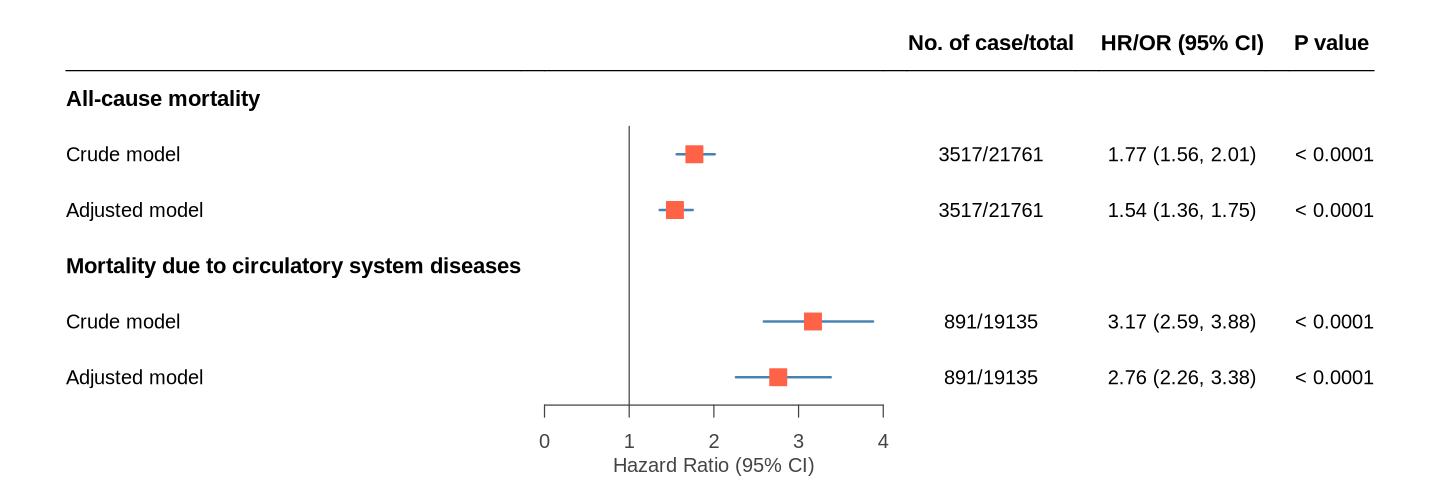

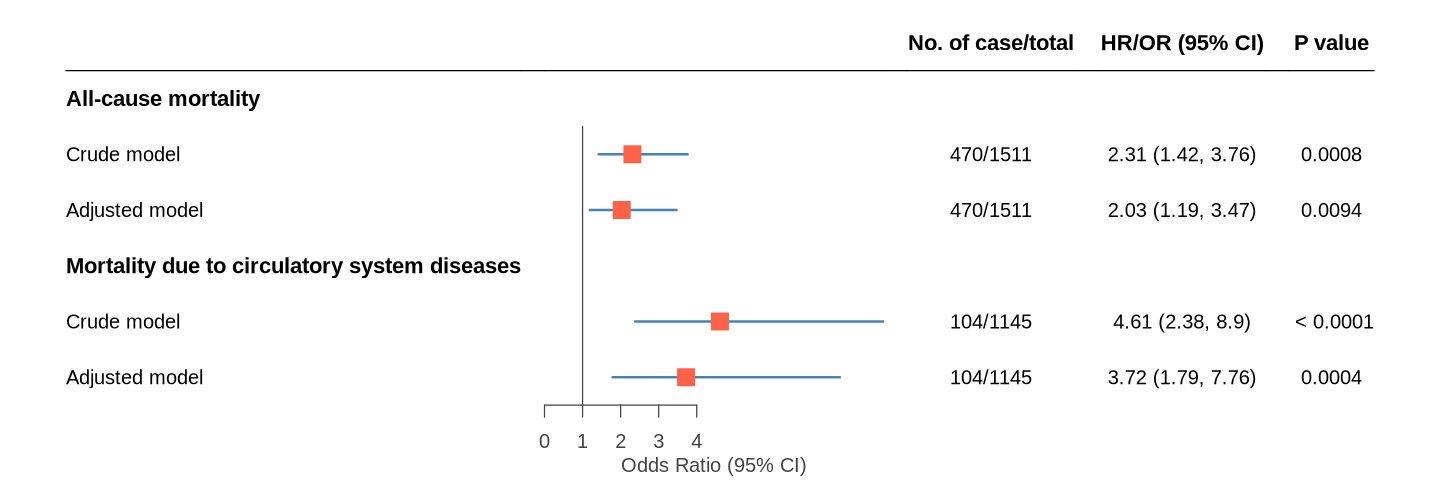

In [4]:
# Generate forest plots
options(repr.plot.width = 12, repr.plot.height = 4.2)
generate_forestplot(cox_table, 
                    "Cox Regression Results", 
                    "Hazard Ratio (95% CI)")

generate_forestplot(logistic_table, 
                    "Logistic Regression Results", 
                    "Odds Ratio (95% CI)")

In [5]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/luo_wenjin/mambaforge/envs/rstudio/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

time zone: Asia/Chongqing
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] repr_1.1.7        forestplot_3.1.3  abind_1.4-5       checkmate_2.2.0  
[5] survival_3.7-0    dplyr_1.1.4       data.table_1.15.4

loaded via a namespace (and not attached):
 [1] crayon_1.5.3      vctrs_0.6.5 